#Video Game Sales Prediction

In [1]:
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from math import inf

## Reading Dataset
we pass our data to a dataframe.

In [2]:
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/VideoGameSales/game_sales_w_score.xlsx", usecols=["Name","Genre", "Year", "Publisher", "Developer", "MetaScore", "UserScore", "TotalShipped"])
"""
Our dataset is a noisy one. So first goal is clear dataset from noises.
To do this, we can remove old datas and unfixable datas.
"""
df = df[(df.Year > 1995.0) & ((df.TotalShipped > 0.1) | ((df.MetaScore.notna() & df.UserScore.notna())))]
df.head()

,Name,Genre,Year,Publisher,Developer,TotalShipped,MetaScore,UserScore
0,Wii Sports,Sports,2006.0,Nintendo,Nintendo EAD,82.86,76.0,8.00
1,Grand Theft Auto V,Action,2014.0,Rockstar Games,Rockstar North,76.89,96.8,8.08
2,Minecraft,Misc,2017.0,Nintendo,Other Ocean Interactive,67.02,93.0,7.60
4,PlayerUnknown's Battlegrounds,Shooter,2018.0,Sony Interactive Entertainment,PUBG Corporation,39.10,81.0,4.40
5,Mario Kart Wii,Racing,2008.0,Nintendo,Nintendo EAD,37.14,82.0,8.40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9397 entries, 0 to 13756
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9397 non-null   object 
 1   Genre         9397 non-null   object 
 2   Year          9397 non-null   float64
 3   Publisher     9397 non-null   object 
 4   Developer     9394 non-null   object 
 5   TotalShipped  9397 non-null   float64
 6   MetaScore     5969 non-null   float64
 7   UserScore     5909 non-null   float64
dtypes: float64(4), object(4)
memory usage: 660.7+ KB
None


After clear the datas, number of rows in our dataset is decreased to 9397.
But there are still some null values. We have to fix them too.

##Data Proprocessing
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://machinelearningmastery.com/handle-missing-data-python/

https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

Fortunately, missing values are in numerical datas. We can use the method which replace null values with mean of spesific\
column that is wrap our current value.
After that replacement, there are couple of missing values(3) in our categorical columns. We can easily, remove them.

In [4]:
# null values
df.fillna(df.mean(), inplace=True)
df.dropna(inplace=True)
df.isna().sum()

Name            0
Genre           0
Year            0
Publisher       0
Developer       0
TotalShipped    0
MetaScore       0
UserScore       0
dtype: int64

Now, there are no any missing values in our dataset.

###Year-TotalShipped

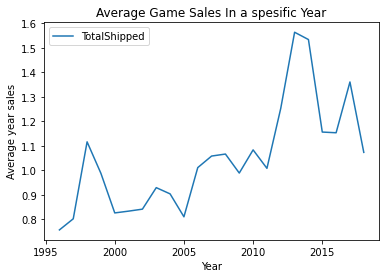

In [5]:
cat_df = df.copy()
year_mean = cat_df.where(cat_df.Year < 2019.0).groupby('Year')['TotalShipped'].mean()
year_mean.plot.line(legend="year", title="Average Game Sales In a spesific Year", ylabel="Average year sales")

To avoid from this noisy column, We categorized the years with 5 different time period.
Now, our dataset is looking like that. More Clear.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


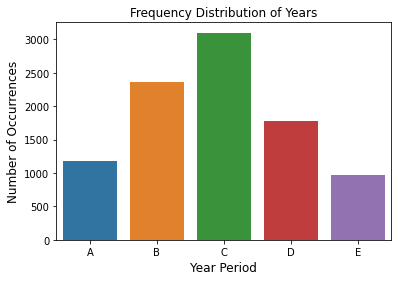

In [6]:
cat_df.Year = pd.cut(cat_df['Year'],5, labels=["A", "B", "C", "D", "E"])
year_count = cat_df['Year'].value_counts()
sns.barplot(year_count.index, year_count.values, alpha=1)
sns.set(style="darkgrid")
plt.title('Frequency Distribution of Years')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year Period', fontsize=12)
plt.show()

###MetaScore-TotalShipped

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


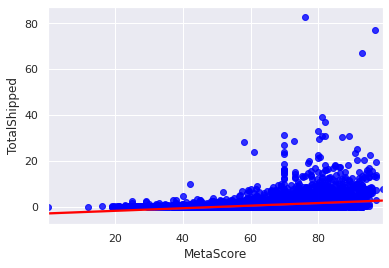

In [7]:
sns.regplot(cat_df['MetaScore'],cat_df['TotalShipped'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

###UserScore-TotalShipped

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


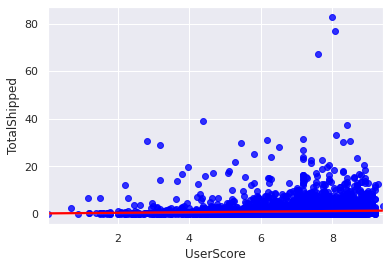

In [8]:
sns.regplot(cat_df['UserScore'],cat_df['TotalShipped'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

###Number of Unique Value

In [9]:
genre_count = cat_df['Genre'].value_counts()
publisher_count = cat_df['Publisher'].value_counts()
dev_count = cat_df['Developer'].value_counts()
print(genre_count.unique())
print(publisher_count.unique())
print(dev_count.unique())

[1288 1102 1099  951  782  673  644  619  568  534  480  344  153   67
   29   28   24    5    3    1]
[550 466 452 398 365 355 353 352 259 206 199 165 162 157 137 133 123 116
  94  90  89  86  83  75  66  64  62  58  56  54  53  52  49  48  47  46
  43  42  39  38  36  35  34  33  32  31  30  29  26  25  24  22  21  19
  18  17  16  15  14  13  12  11  10   9   8   7   6   5   4   3   2   1]
[215 176 167  94  91  86  81  75  70  68  64  61  60  55  44  42  41  40
  39  38  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22  21
  20  19  18  17  16  15  14  13  12  11  10   9   8   7   6   5   4   3
   2   1]


###Classification of Categorical Columns

In [10]:
other_genres = cat_df.Genre.isin(genre_count.index[genre_count<200])
other_publishers = cat_df.Publisher.isin(publisher_count.index[publisher_count<5])
other_developers = cat_df.Developer.isin(dev_count.index[dev_count<5])
cat_df.loc[other_genres, 'Genre'] = 'Other'
cat_df.loc[other_publishers, 'Publisher'] = 'Other'
cat_df.loc[other_developers, 'Developer'] = 'Other'

###Number of Unique Value After Classification

In [11]:
dev_count = cat_df['Developer'].value_counts()
genre_count = cat_df['Genre'].value_counts()
publisher_count = cat_df['Publisher'].value_counts()
print(genre_count.unique())
print(publisher_count.unique())
print(dev_count.unique())

[1288 1102 1099  951  782  673  644  619  568  534  480  344  310]
[667 550 466 452 398 365 355 353 352 259 206 199 165 162 157 137 133 123
 116  94  90  89  86  83  75  66  64  62  58  56  54  53  52  49  48  47
  46  43  42  39  38  36  35  34  33  32  31  30  29  26  25  24  22  21
  19  18  17  16  15  14  13  12  11  10   9   8   7   6   5]
[3036  215  176  167   94   91   86   81   75   70   68   64   61   60
   55   44   42   41   40   39   38   36   35   34   33   32   31   30
   29   28   27   26   25   24   23   22   21   20   19   18   17   16
   15   14   13   12   11   10    9    8    7    6    5]


###Distributions of Categorical Columns according to TotalShipped
https://www.datacamp.com/community/tutorials/categorical-data \
https://www.kaggle.com/getting-started/27270

Now, we have numerical columns and categorical columns.
We have to encode categorical values.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


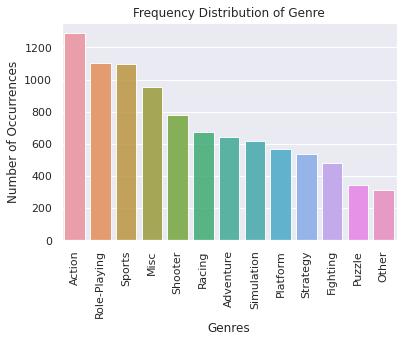

In [12]:
sns.set(style="darkgrid")
genre_plot=sns.barplot(genre_count.index, genre_count.values, alpha=.9)
genre_plot.set_xticklabels(rotation=90, labels=genre_count.index)
plt.title('Frequency Distribution of Genre')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


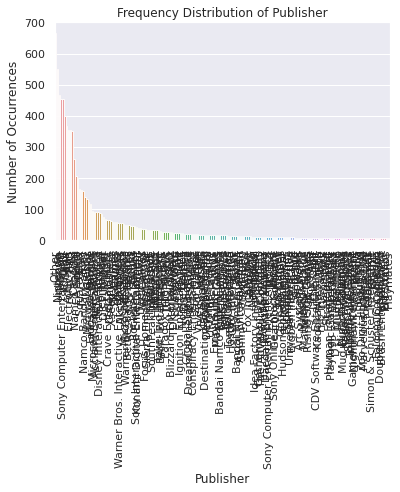

In [13]:
sns.set(style="darkgrid")
publisher_plot =sns.barplot(publisher_count.index, publisher_count.values, alpha=0.9)
publisher_plot.set_xticklabels(rotation=90, labels=publisher_count.index)
plt.title('Frequency Distribution of Publisher')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


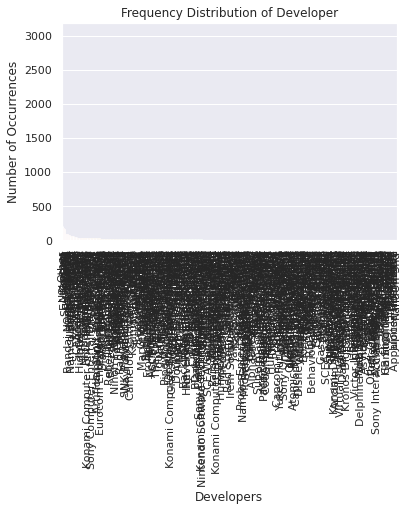

In [14]:
sns.set(style="darkgrid")
dev_plot=sns.barplot(dev_count.index, dev_count.values, alpha=0.9)
dev_plot.set_xticklabels(rotation=90, labels=dev_count.index)
plt.title('Frequency Distribution of Developer')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Developers', fontsize=12)
plt.show()
cat_df = cat_df.drop(columns="Developer")

###TotalShipped Classification
We need to classify our total shipped column because, total shipped column is our y set and we will apply Linear Regression to our train set. Here is classification boundries;\
bad: 0-0.7\
med: 0.7-2\
good: 2-inf

In [15]:
#cat_df.TotalShipped = pd.cut(df['TotalShipped'], [0, 0.7, 2, inf],right=False, labels=[1,2,3])
cat_df.TotalShipped = pd.cut(df['TotalShipped'], [0,2, inf],right=False, labels=[0,1])

###Handling Categorical Columns
https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6 \
https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/ \

We can see from the figure of genre, There is no many categories, so we can use One-hot encoding.
But, in rest of figures, if we apply this method, our dataset will be to grow. So we should use target encoding.

In [16]:
#cat_df = pd.get_dummies(cat_df, columns=["Genre","Publisher"], prefix=["Genre","Publisher"])
cat_df = pd.get_dummies(cat_df, columns=["Year","Genre"], prefix=["Year", "Genre"])
cat_df.head()

,Name,Publisher,TotalShipped,MetaScore,UserScore,Year_A,Year_B,Year_C,Year_D,Year_E,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Other,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,Nintendo,1,76.0,8.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Grand Theft Auto V,Rockstar Games,1,96.8,8.08,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Minecraft,Nintendo,1,93.0,7.60,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,PlayerUnknown's Battlegrounds,Sony Interactive Entertainment,1,81.0,4.40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,Mario Kart Wii,Nintendo,1,82.0,8.40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Below method has an over fitting problem.
Assume there is a publisher which has only a game and this game is a hit game
but this publisher is not a success one. In the test set if there is another game
which published by same pusblisher, and this game has too low sale number. If we apply
any ML algorithm then our error out will be too high. Therefore, we should not use that
method.

In [17]:
cat_df_publisher_old =  df.groupby('Publisher')['TotalShipped'].mean()
cat_df_publisher_old.head()

Publisher
10TACLE Studios    0.935000
11 bit studios     0.095000
1C Company         0.050000
2K Games           1.424286
2K Play            0.520476
Name: TotalShipped, dtype: float64

Additive smoothing(*also called Laplace smoothing*) is a good solution for over fitting.



In [18]:
#https://www.wikiwand.com/en/Additive_smoothing
#additive smoothing
def calc_smooth_mean(df, by, on, alpha):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + alpha * mean) / (counts + alpha)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [19]:
cat_df.Publisher = calc_smooth_mean(df, by='Publisher', on='TotalShipped', alpha=140) #  Target encoding with additive smoothing

##Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
names = cat_df.Name
cat_df = cat_df.drop(columns="Name")
cat_df.head(5)

,Publisher,TotalShipped,MetaScore,UserScore,Year_A,Year_B,Year_C,Year_D,Year_E,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Other,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2.613650,1,76.0,8.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.252233,1,96.8,8.08,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2.613650,1,93.0,7.60,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1.337025,1,81.0,4.40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2.613650,1,82.0,8.40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
validations_lr_in = []
validations_lr_out = []
N = 1
for i in range(N):
  cat_df_no_shipped = cat_df.copy()
  total_shipped = cat_df.TotalShipped
  cat_df_no_shipped.pop("TotalShipped")
  X_train, X_test, y_train, y_test = train_test_split(cat_df_no_shipped, total_shipped,test_size=0.25, shuffle=True)
  logreg = LogisticRegression(max_iter=10000)
  logreg.fit(X_train,y_train)
  pred_1 = logreg.predict(X_test)
  pred_2 = logreg.predict_proba(cat_df_no_shipped)
  score_in = logreg.score(X_train, y_train)
  score_out = logreg.score(X_test,y_test)
  indexes = y_test.index
  output = pd.DataFrame({'Name': names[indexes], 'TotalShipped': pred_1})
  output.to_csv('output.csv', index=False)
  validations_lr_in.append(score_in)
  validations_lr_out.append(score_out)
  weights = logreg.coef_
  y_pred = model.predict(X_test)
  
print("Avg accuracy is", sum(validations_lr_in) / N, "on Train dataset.")
print("Avg accuracy is", sum(validations_lr_out) / N,"on Test dataset.")

Avg accuracy is 0.8929737402413059 on Train dataset.
Avg accuracy is 0.8935717326521925 on Test dataset.


In [23]:
weights_df = pd.DataFrame(data={'Column': cat_df_no_shipped.columns, 'weights': weights[0]})
weights_df.sort_values(by=['weights'], ascending=False)

,Column,weights
0,Publisher,1.283613
12,Genre_Other,0.734436
17,Genre_Shooter,0.722925
10,Genre_Fighting,0.658305
13,Genre_Platform,0.510816
8,Genre_Action,0.447776
15,Genre_Racing,0.252592
5,Year_C,0.236809
6,Year_D,0.172762
1,MetaScore,0.118166


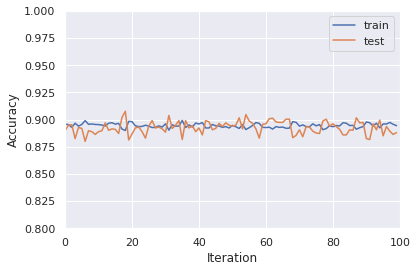

In [24]:
plt.plot(validations_lr_in, label="train")
plt.plot(validations_lr_out, label="test")
plt.legend(['train', 'test'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.axis([0,100,0.8,1])
plt.show()

In [25]:
N = 10
pred_2_sorted_up = sorted(range(len(pred_2)), key=lambda i: pred_2[i][1])[-N:]
pred_2_sorted_down = sorted(range(len(pred_2)), key=lambda i: pred_2[i][1])[N:]
name_arr = np.array(names)
new_df_top = []
new_df_bottom = []
pos = 0
for i in range(N):
  up = pred_2_sorted_up[i]
  bottom = pred_2_sorted_down[i]
  x_values_up = df[up:up+1]
  x_values_down = df[bottom:bottom+1]
  name_up = name_arr[up]
  name_down = name_arr[bottom]  
  new_df_top.append([name_up, x_values_up.Year.item(), x_values_up.Genre.item(), x_values_up.Publisher.item(),
            x_values_up.MetaScore.item(), x_values_up.UserScore.item(), pred_2[up][1]])
  new_df_bottom.append([name_down, x_values_down.Year.item(), x_values_down.Genre.item(), x_values_down.Publisher.item(),
            x_values_down.MetaScore.item(), x_values_down.UserScore.item(), pred_2[bottom][1]])
  pos += 1
top_sales = pd.DataFrame(data=new_df_top, columns=['Name','Year', 'Genre', 'Publisher', 'MetaScore', 'UserScore', 'Probability']) 
top_sales.sort_values(by=['Probability'], ascending=False)

,Name,Year,Genre,Publisher,MetaScore,UserScore,Probability
9,The Legend of Zelda: The Wind Waker,2013.0,Action-Adventure,Nintendo,96.00,8.90,0.924896
8,The Legend of Zelda: Breath of the Wild,2017.0,Action-Adventure,Nintendo,96.50,8.40,0.923622
7,Super Mario Galaxy,2007.0,Platform,Nintendo,97.00,9.00,0.919247
6,Super Mario Galaxy 2,2010.0,Platform,Nintendo,97.00,9.10,0.916439
5,Grand Theft Auto IV,2008.0,Action,Rockstar Games,95.33,7.40,0.909192
4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,97.00,7.85,0.908264
3,Super Smash Bros. Brawl,2008.0,Fighting,Nintendo,93.00,8.80,0.898574
2,Grand Theft Auto V,2014.0,Action,Rockstar Games,96.80,8.08,0.896617
1,Super Mario Odyssey,2017.0,Platform,Nintendo,97.00,8.90,0.894903
0,Metroid Prime,2002.0,Shooter,Nintendo,97.00,9.20,0.892128


In [26]:
bottom_sales = pd.DataFrame(data=new_df_bottom, columns=['Name','Year', 'Genre', 'Publisher', 'MetaScore', 'UserScore', 'Probability']) 
bottom_sales.sort_values(by=['Probability'], ascending=False)

,Name,Year,Genre,Publisher,MetaScore,UserScore,Probability
9,History Great Empires: Rome,2009.0,Strategy,Valcon Games,42.0,7.7,0.000574
8,Digimon Digital Card Battle,2001.0,Strategy,Bandai,51.0,8.8,0.000562
7,Self-Defense Training Camp,2011.0,Sports,Ubisoft,21.0,5.0,0.000544
6,Bubble Bobble Revolution,2006.0,Puzzle,Codemasters,38.0,6.2,0.000536
5,Street Jam Basketball,2004.0,Sports,DSI Games,35.0,8.0,0.000525
4,Shrek Super Party,2003.0,Misc,TDK Mediactive,33.0,7.3,0.000520
3,Antz Extreme Racing,2002.0,Racing,Empire Interactive,35.0,8.7,0.000497
2,Tokyo Tattoo Girls,2017.0,Strategy,NIS America,36.0,4.5,0.000480
1,Nickelodeon Party Blast,2002.0,Misc,Infogrames,19.0,3.0,0.000474
0,Sneakers,2002.0,Puzzle,Microsoft Game Studios,28.0,3.4,0.000455


##Neural Network

In [27]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD,schedules
from sklearn.metrics import mean_squared_error, accuracy_score

In [28]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=There%20is%20currently%20no%20theoretical,more%20than%20one%20hidden%20layer.
validations_nn = []
X_train, X_test ,Y_train , Y_test = train_test_split(cat_df_no_shipped, total_shipped,test_size=0.25, random_state=42, shuffle=True)
number_columns = len(X_train.columns)
model = Sequential()
model.add(Dense(18, input_shape=(number_columns,), activation='relu'))  # input layer
model.add(Dense(12, activation='relu'))  # hidden layer 1
model.add(Dense(8, activation='relu'))  # hidden layer 2
model.add(Dense(1, activation="sigmoid"))  # output layer
# Compiles model
# sthocastic gradient descent SGD
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])  # optimizing method and error function, LR should be large for large outputs
# Fits model

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=10,
                    #shuffle=True,
                    epochs=100,
                    verbose=0
                    )
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

74/74 - 0s - loss: 0.2841 - accuracy: 0.8889


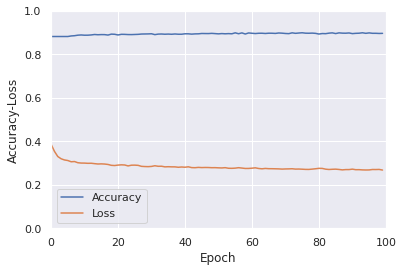

In [31]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["loss"], label="train")
plt.legend(['Accuracy', 'Loss'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy-Loss")
plt.axis([0,100,0,1])
plt.show()

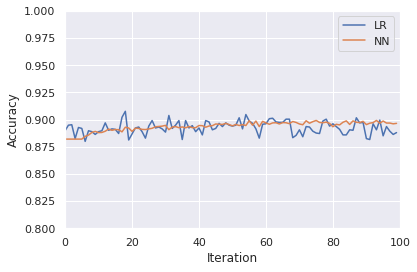

In [30]:
plt.plot(validations_lr_out, label="test")
plt.plot(history.history["accuracy"], label="train")
plt.legend(['LR', 'NN'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.axis([0,100,0.8,1])
plt.show()